In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

import random
from dbn_tf import DBN
from rbm_tf import BBRBM, GBRBM
from util import normalization

/home/manu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/manu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/manu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/manu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [26]:
#X_train_ld = normalization(np.load('X_train_ld.npy'))
#X_test_ld = normalization(np.load('X_test_ld.npy'))
#X_ld = np.concatenate((X_train_ld,X_test_ld),axis=0)

#print("Learning DBN-1 representation")
#hidden=128
#dbn1 = DBN(hidden_layers_structure=[hidden,hidden,hidden],weight_cost=0.001,batch_size=4,n_epoches=30, learning_rate_rbm=[0.0005,1e-2,1e-2],rbm_gauss_visible=True)
#dbn1.fit(X_train_ld)
#X_train_db1 = dbn1.transform(X_train_ld)
#X_test_db1 = dbn1.transform(X_test_ld)
#X_db = np.concatenate()

#X_train_lmd = normalization(np.load('X_train_lmd.npy'))
#X_test_lmd = normalization(np.load('X_test_lmd.npy'))
#X_lmd = np.concatenate((X_train_lmd,X_test_lmd),axis=0)

#print("Learning DBN-2 representation")
#hidden=256
#dbn2 = DBN(hidden_layers_structure=[hidden,hidden,hidden],weight_cost=0.001,batch_size=4,n_epoches=30, learning_rate_rbm=[0.0005,1e-2,1e-2],rbm_gauss_visible=True)
#dbn2.fit(X_train_lmd)
#X_train_db2 = dbn2.transform(X_train_lmd)
#X_test_db2 = dbn2.transform(X_test_lmd)

#X_db2 = dbn1.transform(X_lmd)

#X_db = np.concatenate((X_db1,X_db2),axis=1)

# X_train_db1 = normalization(np.load('X_train_db1.npy'))
# X_train_db2 = normalization(np.load('X_train_db2.npy'))
# X_test_db1 = normalization(np.load('X_test_db1.npy'))
# X_test_db2 = normalization(np.load('X_test_db2.npy'))

# X_db_train =np.concatenate((X_train_db1,X_train_db2),axis=1)
# X_db_test =np.concatenate((X_test_db1,X_test_db2),axis=1)

# print ("Learning Combined representation")
# hidden = 512
# dbn = DBN(hidden_layers_structure=[hidden,hidden,hidden],weight_cost=0.001,batch_size=4,n_epoches=30, learning_rate_rbm=[0.0005,1e-2,1e-2],rbm_gauss_visible=True)
# dbn.fit(X_db_train)
# X_db_train = dbn.transform(X_db_train)
# X_db_test = dbn.transform(X_db_test)
X_db_train = normalization(np.load('X_train_combined.npy'))
X_db_test = normalization(np.load('X_test_combined.npy'))
X_db = np.concatenate((X_db_train,X_db_test))
print(X_db.shape)



/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py

Learning DBN-1 representation


/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py

Learning DBN-2 representation
Learning Combined representation
(5394, 512)


In [18]:
y_train=open('y_train.txt').read().split('\n')[:-1]
y_train=[int(y) for y in y_train]
y_train=np.array(y_train)
y_train=y_train.reshape(y_train.shape[0],1)


y_test=open('y_test.txt').read().split('\n')[:-1]
y_test=[int(y) for y in y_test]
y_test = np.array(y_test)
y_test =y_test.reshape(y_test.shape[0],1)

y_train.shape, y_test.shape

((4314, 1), (1080, 1))

In [27]:
X_all =np.copy(X_db)
X_all =normalization(X_all)
X_all = torch.from_numpy(X_all).type(torch.FloatTensor)

y_all =np.concatenate((y_train,y_test))
y_all =torch.from_numpy(y_all).type(torch.FloatTensor)
X_all.size(),y_all.size()

/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(torch.Size([5394, 512]), torch.Size([5394, 1]))

In [20]:
class LDAClassifier(nn.Module):
    def __init__(self,inp_size):
        super(LDAClassifier,self).__init__()        
        self.att = nn.Linear(inp_size,inp_size)
        self.fc1 = nn.Linear(inp_size, 128)
        self.relu = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, 1)
        self.out_act = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax()
        
    def forward(self, input_):
        t = self.att(input_)
        s = self.tanh(t)
        alpha = self.softmax(s)
        x = torch.mul(alpha,input_)
        a1 = self.fc1(x)
        h1 = self.relu(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.relu(a2)
        #dout = self.dout(h2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
    def predict(self,x):
        #Apply softmax to output. 
        pred = self.forward(x)
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t<0.5:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [21]:
def train_cv(model, X, y, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = clf(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    avg_loss=sum(losses)/len(losses)
    return losses,avg_loss

In [10]:
def avg(l):
    return sum(l)/len(l)

def compute_aupr(y,yhat):
    pre,rec,_ = precision_recall_curve(y,yhat)
    return auc(rec,pre)

In [28]:
aucs = []
avg_pre = []
aupr = []
acc = []
cv = StratifiedKFold(n_splits=5)
num_epochs = 30
fold_loss =[]
for i, (train, test) in enumerate(cv.split(X_all, y_all)):
    clf = LDAClassifier(X_all.size()[1])
    opt = optim.Adam(clf.parameters(), lr=0.001, betas=(0.9, 0.999),weight_decay=1e-5)
    criterion = nn.BCELoss()
        
    e_losses = []
    for e in range(num_epochs):
        los,avg_loss = train_cv(clf,X_all[train],y_all[train],opt,criterion)
        e_losses += [avg_loss]
        print ("Fold:%d Epoch:%d/%d Train loss:%f" %(i+1,e,num_epochs,avg_loss))
    fold_loss.append(e_losses)
    y_pred = clf.predict(X_all[test])
    aucs.append(roc_auc_score(y_all[test],y_pred))
    avg_pre.append(average_precision_score(y_all[test],y_pred))
    aupr.append(compute_aupr(y_all[test],y_pred))
    acc.append(accuracy_score(y_all[test],y_pred))
    print("Test accuracy:%f" %acc[-1])
    print('\n')

    #print (aucs)
    #print (avg_pre)
    #print (aupr)
print ("AUC:%f AUPR: %f Avg Pre: %f Accuracy: %f" %(avg(aucs),avg(aupr),avg(avg_pre),avg(acc)))
#return fold_loss

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:1 Epoch:0/30 Train loss:0.561577
Fold:1 Epoch:1/30 Train loss:0.315723
Fold:1 Epoch:2/30 Train loss:0.284868
Fold:1 Epoch:3/30 Train loss:0.270554
Fold:1 Epoch:4/30 Train loss:0.260254
Fold:1 Epoch:5/30 Train loss:0.253438
Fold:1 Epoch:6/30 Train loss:0.245720
Fold:1 Epoch:7/30 Train loss:0.238661
Fold:1 Epoch:8/30 Train loss:0.231237
Fold:1 Epoch:9/30 Train loss:0.225630
Fold:1 Epoch:10/30 Train loss:0.219685
Fold:1 Epoch:11/30 Train loss:0.216284
Fold:1 Epoch:12/30 Train loss:0.207400
Fold:1 Epoch:13/30 Train loss:0.203809
Fold:1 Epoch:14/30 Train loss:0.197261
Fold:1 Epoch:15/30 Train loss:0.195038
Fold:1 Epoch:16/30 Train loss:0.189675
Fold:1 Epoch:17/30 Train loss:0.183270
Fold:1 Epoch:18/30 Train loss:0.178679
Fold:1 Epoch:19/30 Train loss:0.176900
Fold:1 Epoch:20/30 Train loss:0.173541
Fold:1 Epoch:21/30 Train loss:0.167567
Fold:1 Epoch:22/30 Train loss:0.162102
Fold:1 Epoch:23/30 Train loss:0.157948
Fold:1 Epoch:24/30 Train loss:0.156494
Fold:1 Epoch:25/30 Train loss:0.153

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:2 Epoch:0/30 Train loss:0.545995
Fold:2 Epoch:1/30 Train loss:0.304799
Fold:2 Epoch:2/30 Train loss:0.278488
Fold:2 Epoch:3/30 Train loss:0.265173
Fold:2 Epoch:4/30 Train loss:0.256084
Fold:2 Epoch:5/30 Train loss:0.249575
Fold:2 Epoch:6/30 Train loss:0.239943
Fold:2 Epoch:7/30 Train loss:0.233887
Fold:2 Epoch:8/30 Train loss:0.229845
Fold:2 Epoch:9/30 Train loss:0.224082
Fold:2 Epoch:10/30 Train loss:0.216960
Fold:2 Epoch:11/30 Train loss:0.211162
Fold:2 Epoch:12/30 Train loss:0.206397
Fold:2 Epoch:13/30 Train loss:0.203538
Fold:2 Epoch:14/30 Train loss:0.196613
Fold:2 Epoch:15/30 Train loss:0.193124
Fold:2 Epoch:16/30 Train loss:0.186316
Fold:2 Epoch:17/30 Train loss:0.184304
Fold:2 Epoch:18/30 Train loss:0.175961
Fold:2 Epoch:19/30 Train loss:0.173276
Fold:2 Epoch:20/30 Train loss:0.168356
Fold:2 Epoch:21/30 Train loss:0.162622
Fold:2 Epoch:22/30 Train loss:0.158177
Fold:2 Epoch:23/30 Train loss:0.154088
Fold:2 Epoch:24/30 Train loss:0.151360
Fold:2 Epoch:25/30 Train loss:0.145

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:3 Epoch:0/30 Train loss:0.533088
Fold:3 Epoch:1/30 Train loss:0.305910
Fold:3 Epoch:2/30 Train loss:0.277480
Fold:3 Epoch:3/30 Train loss:0.264413
Fold:3 Epoch:4/30 Train loss:0.253061
Fold:3 Epoch:5/30 Train loss:0.244186
Fold:3 Epoch:6/30 Train loss:0.235941
Fold:3 Epoch:7/30 Train loss:0.230333
Fold:3 Epoch:8/30 Train loss:0.223287
Fold:3 Epoch:9/30 Train loss:0.220617
Fold:3 Epoch:10/30 Train loss:0.214247
Fold:3 Epoch:11/30 Train loss:0.211708
Fold:3 Epoch:12/30 Train loss:0.206193
Fold:3 Epoch:13/30 Train loss:0.197766
Fold:3 Epoch:14/30 Train loss:0.196473
Fold:3 Epoch:15/30 Train loss:0.189465
Fold:3 Epoch:16/30 Train loss:0.190404
Fold:3 Epoch:17/30 Train loss:0.181979
Fold:3 Epoch:18/30 Train loss:0.177312
Fold:3 Epoch:19/30 Train loss:0.172196
Fold:3 Epoch:20/30 Train loss:0.169060
Fold:3 Epoch:21/30 Train loss:0.162194
Fold:3 Epoch:22/30 Train loss:0.159313
Fold:3 Epoch:23/30 Train loss:0.156526
Fold:3 Epoch:24/30 Train loss:0.153140
Fold:3 Epoch:25/30 Train loss:0.145

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:4 Epoch:0/30 Train loss:0.536228
Fold:4 Epoch:1/30 Train loss:0.310979
Fold:4 Epoch:2/30 Train loss:0.285296
Fold:4 Epoch:3/30 Train loss:0.274690
Fold:4 Epoch:4/30 Train loss:0.262373
Fold:4 Epoch:5/30 Train loss:0.256298
Fold:4 Epoch:6/30 Train loss:0.250583
Fold:4 Epoch:7/30 Train loss:0.239838
Fold:4 Epoch:8/30 Train loss:0.235332
Fold:4 Epoch:9/30 Train loss:0.230311
Fold:4 Epoch:10/30 Train loss:0.224275
Fold:4 Epoch:11/30 Train loss:0.220780
Fold:4 Epoch:12/30 Train loss:0.214251
Fold:4 Epoch:13/30 Train loss:0.210701
Fold:4 Epoch:14/30 Train loss:0.203007
Fold:4 Epoch:15/30 Train loss:0.202033
Fold:4 Epoch:16/30 Train loss:0.195228
Fold:4 Epoch:17/30 Train loss:0.190657
Fold:4 Epoch:18/30 Train loss:0.185674
Fold:4 Epoch:19/30 Train loss:0.179589
Fold:4 Epoch:20/30 Train loss:0.175411
Fold:4 Epoch:21/30 Train loss:0.168257
Fold:4 Epoch:22/30 Train loss:0.166340
Fold:4 Epoch:23/30 Train loss:0.162099
Fold:4 Epoch:24/30 Train loss:0.154836
Fold:4 Epoch:25/30 Train loss:0.152

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:5 Epoch:0/30 Train loss:0.549565
Fold:5 Epoch:1/30 Train loss:0.310742
Fold:5 Epoch:2/30 Train loss:0.281984
Fold:5 Epoch:3/30 Train loss:0.268775
Fold:5 Epoch:4/30 Train loss:0.258769
Fold:5 Epoch:5/30 Train loss:0.249944
Fold:5 Epoch:6/30 Train loss:0.242799
Fold:5 Epoch:7/30 Train loss:0.236721
Fold:5 Epoch:8/30 Train loss:0.229517
Fold:5 Epoch:9/30 Train loss:0.224948
Fold:5 Epoch:10/30 Train loss:0.219520
Fold:5 Epoch:11/30 Train loss:0.213347
Fold:5 Epoch:12/30 Train loss:0.211270
Fold:5 Epoch:13/30 Train loss:0.204104
Fold:5 Epoch:14/30 Train loss:0.199518
Fold:5 Epoch:15/30 Train loss:0.198811
Fold:5 Epoch:16/30 Train loss:0.195025
Fold:5 Epoch:17/30 Train loss:0.188322
Fold:5 Epoch:18/30 Train loss:0.182268
Fold:5 Epoch:19/30 Train loss:0.180539
Fold:5 Epoch:20/30 Train loss:0.177728
Fold:5 Epoch:21/30 Train loss:0.173261
Fold:5 Epoch:22/30 Train loss:0.169029
Fold:5 Epoch:23/30 Train loss:0.166700
Fold:5 Epoch:24/30 Train loss:0.163756
Fold:5 Epoch:25/30 Train loss:0.159

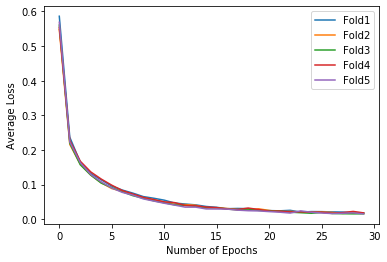

In [16]:
for i in range(len(fold_loss)):
    plt.plot(fold_loss[i],label='Fold'+str(i+1))
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Average Loss")
#plt.savefig('learning_curve.jpeg',dpi=300)
plt.savefig('learning_curve.svg',dpi=300)
plt.show()

In [14]:
#Plot ROC
fpr_list=[]
tpr_list=[]
aucs=[]
cv = StratifiedKFold(n_splits=5)
num_epochs = 30
fold_loss =[]
for i, (train, test) in enumerate(cv.split(X_all, y_all)):
    clf = LDAClassifier(X_all.size()[1])
    opt = optim.Adam(clf.parameters(), lr=0.001, betas=(0.9, 0.999),weight_decay=1e-5)
    criterion = nn.BCELoss()
        
    e_losses = []
    for e in range(num_epochs):
        los,avg_loss = train_cv(clf,X_all[train],y_all[train],opt,criterion)
        e_losses += [avg_loss]
        print ("Fold:%d Epoch:%d/%d Train loss:%f" %(i+1,e,num_epochs,avg_loss))
    
    fold_loss.append(e_losses)
    y_pred = clf.predict(X_all[test])
    fpr,tpr,_= roc_curve(y_all[test],y_pred)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    aucs.append(roc_auc_score(y_all[test],y_pred))
    #print("Test accuracy:%f" %acc[-1])
    print('\n')

    #print (aucs)
    #print (avg_pre)
    #print (aupr)
#print ("AUC:%f AUPR: %f Avg Pre: %f Accuracy: %f" %(avg(aucs),avg(aupr),avg(avg_pre),avg(acc)))
#return fold_loss

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:1 Epoch:0/30 Train loss:0.585970
Fold:1 Epoch:1/30 Train loss:0.236701
Fold:1 Epoch:2/30 Train loss:0.164770
Fold:1 Epoch:3/30 Train loss:0.132173
Fold:1 Epoch:4/30 Train loss:0.113756
Fold:1 Epoch:5/30 Train loss:0.095770
Fold:1 Epoch:6/30 Train loss:0.084302
Fold:1 Epoch:7/30 Train loss:0.075449
Fold:1 Epoch:8/30 Train loss:0.065433
Fold:1 Epoch:9/30 Train loss:0.060604
Fold:1 Epoch:10/30 Train loss:0.055072
Fold:1 Epoch:11/30 Train loss:0.046754
Fold:1 Epoch:12/30 Train loss:0.043902
Fold:1 Epoch:13/30 Train loss:0.041473
Fold:1 Epoch:14/30 Train loss:0.036836
Fold:1 Epoch:15/30 Train loss:0.034433
Fold:1 Epoch:16/30 Train loss:0.030434
Fold:1 Epoch:17/30 Train loss:0.031146
Fold:1 Epoch:18/30 Train loss:0.030584
Fold:1 Epoch:19/30 Train loss:0.026239
Fold:1 Epoch:20/30 Train loss:0.024969
Fold:1 Epoch:21/30 Train loss:0.024278
Fold:1 Epoch:22/30 Train loss:0.025790
Fold:1 Epoch:23/30 Train loss:0.020604
Fold:1 Epoch:24/30 Train loss:0.022079
Fold:1 Epoch:25/30 Train loss:0.021

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:2 Epoch:0/30 Train loss:0.547196
Fold:2 Epoch:1/30 Train loss:0.216011
Fold:2 Epoch:2/30 Train loss:0.158805
Fold:2 Epoch:3/30 Train loss:0.127700
Fold:2 Epoch:4/30 Train loss:0.105190
Fold:2 Epoch:5/30 Train loss:0.088530
Fold:2 Epoch:6/30 Train loss:0.080625
Fold:2 Epoch:7/30 Train loss:0.071080
Fold:2 Epoch:8/30 Train loss:0.062068
Fold:2 Epoch:9/30 Train loss:0.056034
Fold:2 Epoch:10/30 Train loss:0.049191
Fold:2 Epoch:11/30 Train loss:0.042802
Fold:2 Epoch:12/30 Train loss:0.042327
Fold:2 Epoch:13/30 Train loss:0.040425
Fold:2 Epoch:14/30 Train loss:0.032415
Fold:2 Epoch:15/30 Train loss:0.033172
Fold:2 Epoch:16/30 Train loss:0.031083
Fold:2 Epoch:17/30 Train loss:0.027973
Fold:2 Epoch:18/30 Train loss:0.027467
Fold:2 Epoch:19/30 Train loss:0.030008
Fold:2 Epoch:20/30 Train loss:0.025462
Fold:2 Epoch:21/30 Train loss:0.021582
Fold:2 Epoch:22/30 Train loss:0.022652
Fold:2 Epoch:23/30 Train loss:0.021266
Fold:2 Epoch:24/30 Train loss:0.019780
Fold:2 Epoch:25/30 Train loss:0.020

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:3 Epoch:0/30 Train loss:0.560369
Fold:3 Epoch:1/30 Train loss:0.219609
Fold:3 Epoch:2/30 Train loss:0.157252
Fold:3 Epoch:3/30 Train loss:0.127227
Fold:3 Epoch:4/30 Train loss:0.104281
Fold:3 Epoch:5/30 Train loss:0.091285
Fold:3 Epoch:6/30 Train loss:0.079452
Fold:3 Epoch:7/30 Train loss:0.068072
Fold:3 Epoch:8/30 Train loss:0.060679
Fold:3 Epoch:9/30 Train loss:0.053113
Fold:3 Epoch:10/30 Train loss:0.047491
Fold:3 Epoch:11/30 Train loss:0.041516
Fold:3 Epoch:12/30 Train loss:0.039829
Fold:3 Epoch:13/30 Train loss:0.037268
Fold:3 Epoch:14/30 Train loss:0.033115
Fold:3 Epoch:15/30 Train loss:0.033265
Fold:3 Epoch:16/30 Train loss:0.029181
Fold:3 Epoch:17/30 Train loss:0.027502
Fold:3 Epoch:18/30 Train loss:0.029441
Fold:3 Epoch:19/30 Train loss:0.025466
Fold:3 Epoch:20/30 Train loss:0.024494
Fold:3 Epoch:21/30 Train loss:0.024034
Fold:3 Epoch:22/30 Train loss:0.020339
Fold:3 Epoch:23/30 Train loss:0.018828
Fold:3 Epoch:24/30 Train loss:0.017242
Fold:3 Epoch:25/30 Train loss:0.019

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:4 Epoch:0/30 Train loss:0.553735
Fold:4 Epoch:1/30 Train loss:0.227829
Fold:4 Epoch:2/30 Train loss:0.167460
Fold:4 Epoch:3/30 Train loss:0.136568
Fold:4 Epoch:4/30 Train loss:0.115906
Fold:4 Epoch:5/30 Train loss:0.098281
Fold:4 Epoch:6/30 Train loss:0.083107
Fold:4 Epoch:7/30 Train loss:0.073018
Fold:4 Epoch:8/30 Train loss:0.063228
Fold:4 Epoch:9/30 Train loss:0.056914
Fold:4 Epoch:10/30 Train loss:0.050221
Fold:4 Epoch:11/30 Train loss:0.047940
Fold:4 Epoch:12/30 Train loss:0.039759
Fold:4 Epoch:13/30 Train loss:0.038675
Fold:4 Epoch:14/30 Train loss:0.035183
Fold:4 Epoch:15/30 Train loss:0.033593
Fold:4 Epoch:16/30 Train loss:0.029274
Fold:4 Epoch:17/30 Train loss:0.027981
Fold:4 Epoch:18/30 Train loss:0.032332
Fold:4 Epoch:19/30 Train loss:0.028090
Fold:4 Epoch:20/30 Train loss:0.023337
Fold:4 Epoch:21/30 Train loss:0.023618
Fold:4 Epoch:22/30 Train loss:0.021091
Fold:4 Epoch:23/30 Train loss:0.021357
Fold:4 Epoch:24/30 Train loss:0.020515
Fold:4 Epoch:25/30 Train loss:0.020

/home/manu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Fold:5 Epoch:0/30 Train loss:0.568653
Fold:5 Epoch:1/30 Train loss:0.223268
Fold:5 Epoch:2/30 Train loss:0.163209
Fold:5 Epoch:3/30 Train loss:0.129105
Fold:5 Epoch:4/30 Train loss:0.107882
Fold:5 Epoch:5/30 Train loss:0.090304
Fold:5 Epoch:6/30 Train loss:0.077587
Fold:5 Epoch:7/30 Train loss:0.069625
Fold:5 Epoch:8/30 Train loss:0.058759
Fold:5 Epoch:9/30 Train loss:0.052462
Fold:5 Epoch:10/30 Train loss:0.046173
Fold:5 Epoch:11/30 Train loss:0.040773
Fold:5 Epoch:12/30 Train loss:0.034934
Fold:5 Epoch:13/30 Train loss:0.034886
Fold:5 Epoch:14/30 Train loss:0.029745
Fold:5 Epoch:15/30 Train loss:0.029524
Fold:5 Epoch:16/30 Train loss:0.029261
Fold:5 Epoch:17/30 Train loss:0.026278
Fold:5 Epoch:18/30 Train loss:0.024605
Fold:5 Epoch:19/30 Train loss:0.023990
Fold:5 Epoch:20/30 Train loss:0.022014
Fold:5 Epoch:21/30 Train loss:0.020331
Fold:5 Epoch:22/30 Train loss:0.017813
Fold:5 Epoch:23/30 Train loss:0.024209
Fold:5 Epoch:24/30 Train loss:0.020268
Fold:5 Epoch:25/30 Train loss:0.017

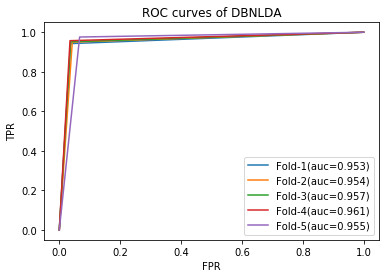

In [15]:
for i in range(len(aucs)):
    plt.plot(fpr_list[i],tpr_list[i],label="Fold-"+str(i+1)+"(auc="+str(round(aucs[i],3))+")")
    plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curves of DBNLDA')
#plt.savefig('roc.jpeg',dpi=300)
plt.savefig('roc.svg',dpi=300)
plt.show()